# Task 1: Exploratory Data Analysis

**Name:** Lock Yan Fong, Brendon

**Admin number**: 230739G

**Business Objective:** Train an ML model using PyCaret to predict heart disease events based on clinical features 

**Dataset:** Heart Failure Prediction Dataset

**Dataset Description:** The dataset, which is in Comma-Separated Value(CSV) format, contains 11 clinical features to predict heart disease events such as RestingBP, Cholesterol, MaxHR etc.

We will first start with importing the necessary libraries and my csv heart dataset into the notebook.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**Column Desciption/Explantions**

*Age*: age of the patient [years]

*Sex*: sex of the patient [M: Male, F: Female]

*ChestPainType*: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

*RestingBP*: resting blood pressure [mm Hg]

*Cholesterol*: serum cholesterol [mm/dl]

*FastingBS*: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

*RestingECG*: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

- **ST:** indicate conditions affecting the heart muscle (maybe lead to heart disease, not definite) | **LVH:** a sign of an underlying heart or cardiovascular disease


*MaxHR*: maximum heart rate achieved [Numeric value between 60 and 202]

*ExerciseAngina*: exercise-induced angina [Y: Yes, N: No]
- Yes (Y): Experience chest pain, tightness, or discomfort specifically during physical exertion or exercise. Warning sign that you are at increased risk for a heart attack, irregular heartbeat, or cardiac arrest if left untreated

*Oldpeak*: oldpeak = ST [Numeric value measured in depression] 
- **0:** Normal, or healthy, indicating no exercise-induced ischemia.
**Negative:** Represents ST elevation, which differs from the typical "depression" marker for ischemia.
**High Positive (>0):** Strong predictor of heart disease

*ST_Slope*: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- **Up:** Generally considered a normal response to exercise, indicating a lower likelihood of heart disease. 
**Flat:** Often indicates a higher probability of myocardial ischemia or heart disease. (NEGATIVE)
**Down:** Highly concerning for coronary artery disease (CAD), suggesting significant ischemia. (NEGATIVE)

*HeartDisease*: output class [1: heart disease, 0: Normal]

## Quick Data Understanding and Preparation

In [44]:
# Standardising a few columns with team mate, later integration would be easier/standardised
df = df.rename(columns={
    "Sex": "Gender",
    "RestingBP": "RestingDiastolicBP",
    "Cholesterol": "CholesterolTotal"
})


In [45]:
# Checking the updated standardised column
df.columns

Index(['Age', 'Gender', 'ChestPainType', 'RestingDiastolicBP',
       'CholesterolTotal', 'FastingBS', 'RestingECG', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease'],
      dtype='object')

In [46]:
df.head()

,Age,Gender,ChestPainType,RestingDiastolicBP,CholesterolTotal,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [47]:
# Check if there is anomally or weird values for the numeric columns
df.describe()

,Age,RestingDiastolicBP,CholesterolTotal,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


The summary statistics above indicate that the numerical variables fall within plausible and expected ranges, with no evident anomalies or implausible values observed. Measures of central tendency and dispersion are consistent with typical clinical data, and the minimum and maximum values do not suggest data entry errors or extreme irregularities. Overall, the dataset appears well-behaved and suitable for subsequent modelling without requiring additional corrective preprocessing at this stage.

In [48]:
# Check if there is duplicated rows
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [49]:
# Check for null values
null_summary = df.isnull().sum().sort_values(ascending=False)
print("\nNull values per column:")
print(null_summary)


Null values per column:
Age                   0
Gender                0
ChestPainType         0
RestingDiastolicBP    0
CholesterolTotal      0
FastingBS             0
RestingECG            0
MaxHR                 0
ExerciseAngina        0
Oldpeak               0
ST_Slope              0
HeartDisease          0
dtype: int64


In [50]:
# To ensure: removes leading and trailing whitespace from column names
df.columns = df.columns.str.strip()

In [51]:
# overall understanding and check of the dataframe after data prep
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 918 non-null    int64  
 1   Gender              918 non-null    object 
 2   ChestPainType       918 non-null    object 
 3   RestingDiastolicBP  918 non-null    int64  
 4   CholesterolTotal    918 non-null    int64  
 5   FastingBS           918 non-null    int64  
 6   RestingECG          918 non-null    object 
 7   MaxHR               918 non-null    int64  
 8   ExerciseAngina      918 non-null    object 
 9   Oldpeak             918 non-null    float64
 10  ST_Slope            918 non-null    object 
 11  HeartDisease        918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Exploratory Data Analysis (EDA)

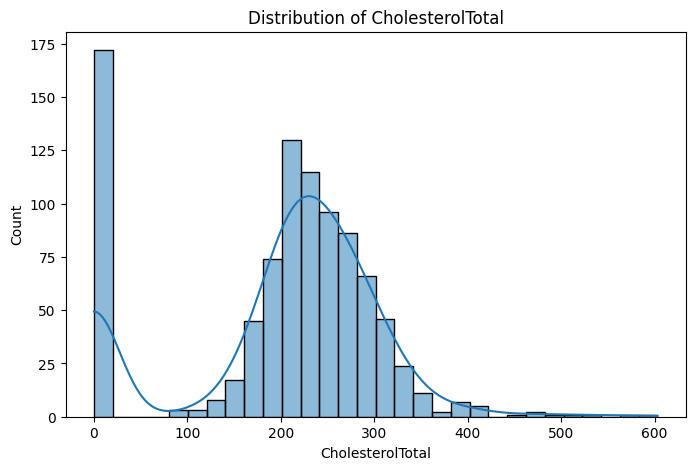

In [52]:
plt.figure(figsize=(8,5))
sns.histplot(df["CholesterolTotal"], bins=30, kde=True)
plt.title("Distribution of CholesterolTotal")
plt.xlabel("CholesterolTotal")
plt.ylabel("Count")
plt.show()


The histogram above shows the distribution of CholesterolTotal, which shows a wide spread with a clear right-skew. While the majority of observations are concentrated between approximately 150 and 300, there is a long tail extending towards higher values, indicating the presence of outliers. In addition, a notable spike at very low or zero cholesterol values suggests potential measurement artefacts or special cases in the dataset. This non-normal distribution and the presence of extreme values indicate that the variable operates on a different scale compared to other clinical features, which may influence model behaviour if left unprocessed

Due to the wide spread and skewed distribution of CholesterolTotal, **scaling will be applied during task 2 using pycaret** to ensure that this variable does not dominate the learning process of models sensitive to feature magnitude.

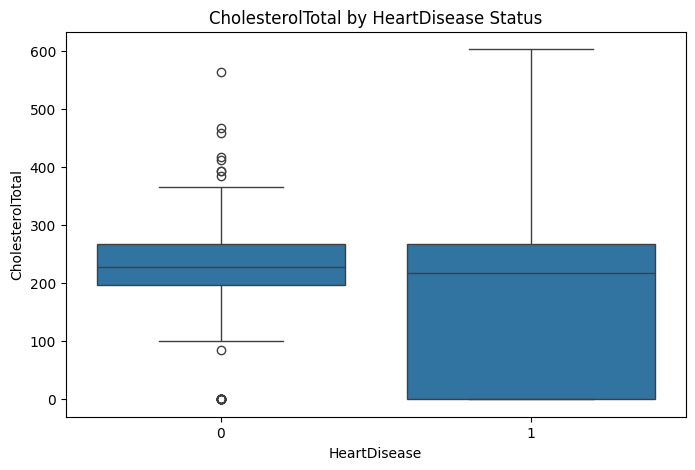

In [53]:
plt.figure(figsize=(8,5))
sns.boxplot(x="HeartDisease", y="CholesterolTotal", data=df)
plt.title("CholesterolTotal by HeartDisease Status")
plt.xlabel("HeartDisease")
plt.ylabel("CholesterolTotal")
plt.show()


The above boxplot compares the distribution of CholesterolTotal across patients with and without heart disease. While the median cholesterol levels of the two groups are relatively similar, the heart disease group exhibits a noticeably wider interquartile range and greater variability. This suggests that cholesterol levels among individuals with heart disease are more dispersed, with a higher presence of extreme values. The substantial overlap between the two distributions indicates that cholesterol alone may not be a strong discriminator of heart disease status, reinforcing the need to consider it alongside other clinical features in the model.

**Note:** From the above boxplot, the CholesterolTotal max value is 603, which does not indicate an anomally and actually is an important value as it signifies a high risk of heart disease which is informational and beneficial to be used for model training later on.

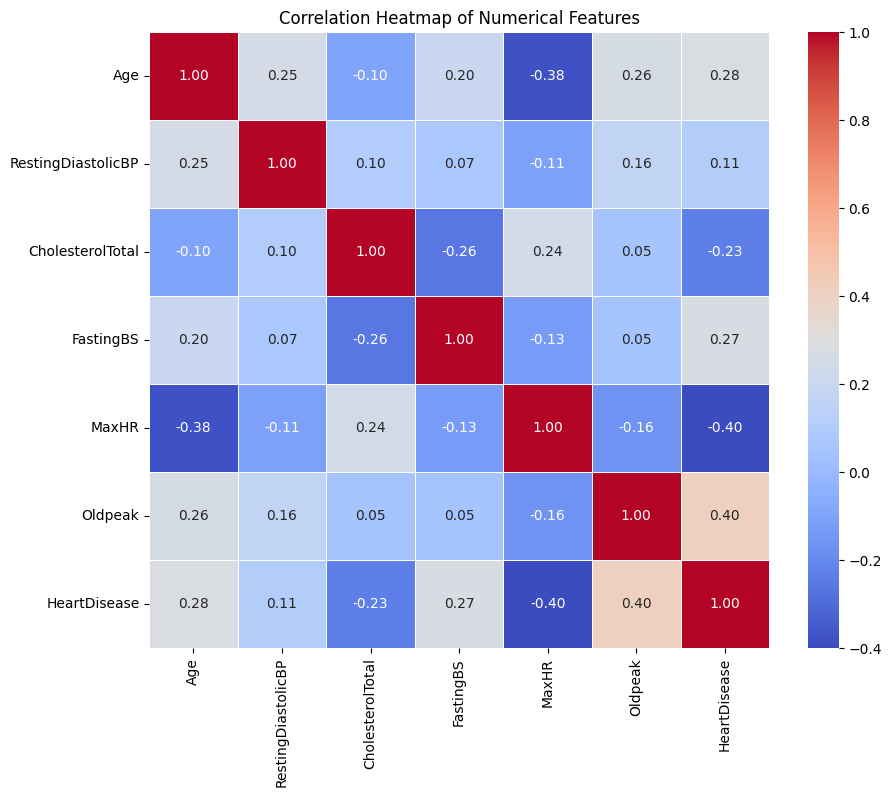

In [54]:
plt.figure(figsize=(10,8))
corr = df.select_dtypes(include="number").corr()

sns.heatmap(
    corr,
    cmap="coolwarm",
    annot=True,          # show values
    fmt=".2f",           # 2 decimal places
    linewidths=0.5
)

plt.title("Correlation Heatmap of Numerical Features")
plt.show()



The correlation heatmap above illustrates the linear relationships among the numerical features and the target variable. Overall, most feature pairs exhibit weak to moderate correlations, suggesting limited multicollinearity within the dataset. Oldpeak shows the strongest positive correlation with heart disease of around 0.40, while MaxHR displays a moderate negative correlation of −0.40, indicating that lower maximum heart rate values are associated with higher likelihood of heart disease. In contrast, CholesterolTotal demonstrates only a weak negative correlation with the target, implying that cholesterol alone is not a strong linear predictor of heart disease. These findings suggest that heart disease risk is **influenced by multiple interacting factors** rather than any single numerical feature.

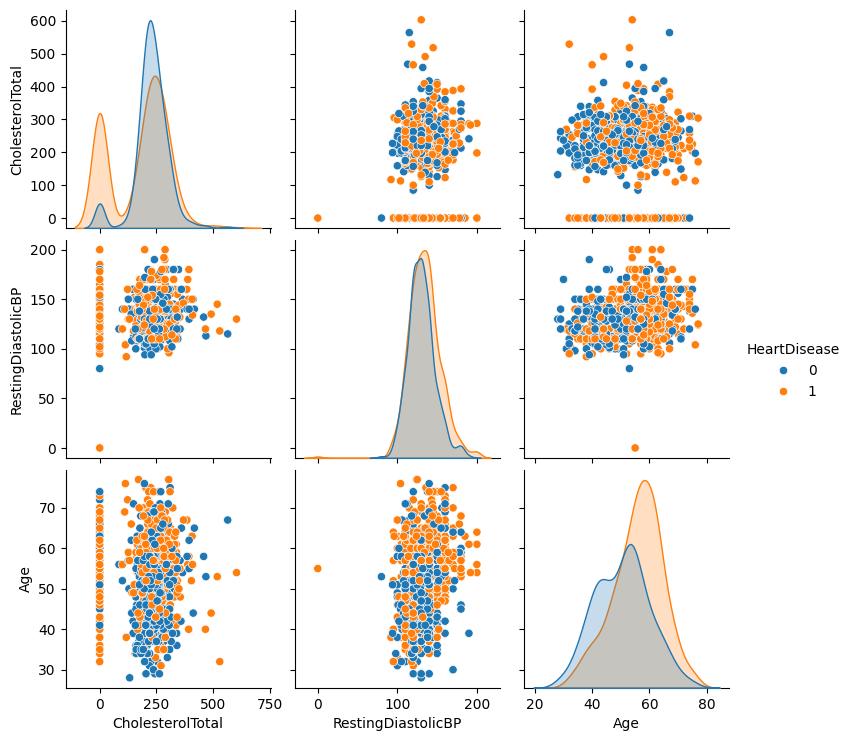

In [55]:
# Explore interaction patterns without dumping a full pairplot, chose interesting feature pairs of numerical columns that could be insightful
selected_features = [
    "CholesterolTotal",
    "RestingDiastolicBP",
    "Age"
]

sns.pairplot(
    df[selected_features + ["HeartDisease"]],
    hue="HeartDisease",
    diag_kind="kde"
)
plt.show()


The pairwise plots above examine the distributions and relationships among age, resting diastolic blood pressure, and total cholesterol, stratified by heart disease status. 

The diagonal density plots show that individuals with heart disease tend to be older on average, with a noticeable rightward shift in the age distribution. 

In contrast, the distributions of cholesterol and resting diastolic blood pressure show substantial overlap between the two groups, indicating weaker discriminatory power when considered individually. The scatter plots further reveal no strong linear separation between classes across feature pairs, suggesting that heart disease risk is influenced by a combination of variables rather than clear bivariate thresholds. This supports the use of multivariate models to capture interactions across features.

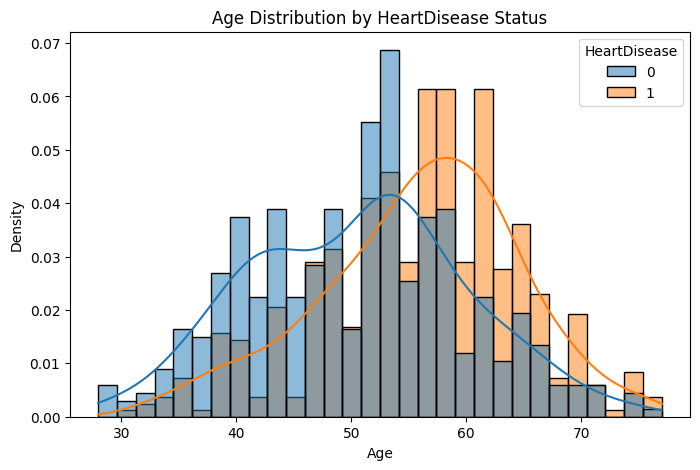

In [40]:
# Age vs HeartDisease (any correlation?)
plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x="Age",
    hue="HeartDisease",
    bins=30,
    kde=True,
    stat="density",
    common_norm=False
)
plt.title("Age Distribution by HeartDisease Status")
plt.xlabel("Age")
plt.show()


The age distribution plot above compares individuals with and without heart disease and reveals a clear shift towards older ages among those with heart disease. While there is overlap between the two groups, the density curve for heart disease cases is noticeably right-shifted, indicating a higher concentration of cases in the older age range. This suggests that age is positively associated with heart disease risk, although it is not sufficient on its own to fully separate the two classes. Overall, the chart highlights age as an important contributory feature that i would consider, alongside other clinical variables in the predictive model.

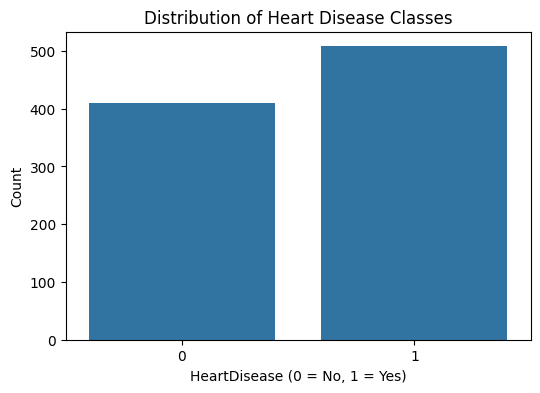

HeartDisease
1    55.337691
0    44.662309
Name: proportion, dtype: float64

In [63]:
# to check inbalance of heart disease class
plt.figure(figsize=(6,4))
sns.countplot(
    x="HeartDisease",
    data=df
)

plt.title("Distribution of Heart Disease Classes")
plt.xlabel("HeartDisease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

counts = df["HeartDisease"].value_counts(normalize=True) * 100
counts


The class distribution plot shows a moderate imbalance between patients with and without heart disease. While both classes are well represented, the positive class occurs slightly more frequently, indicating that accuracy alone may not fully reflect model performance. As a result, F1-score will be adopted as the primary evaluation metric during my Task 2 when evaluating the models, as it balances precision and recall and provides a more reliable assessment of performance under class imbalance.

Accuracy can be misleading in the presence of class imbalance, whereas F1-score accounts for both false positives and false negatives.

## Download csv file after data preparation to be used for Task 2

In [56]:
df.to_csv("heart_modified.csv", index=False)
